In [36]:
!pip install nltk
import nltk

DEPRECATION: Loading egg at c:\users\parv\anaconda3\envs\pytorch_gpu\lib\site-packages\ont_bonito-0.8.1-py3.12.egg is deprecated. pip 24.3 will enforce this behaviour change. A possible replacement is to use pip for package installation.. Discussion can be found at https://github.com/pypa/pip/issues/12330


     ---------------------------------------- 0.0/41.5 kB ? eta -:--:--
     ------------------ ------------------- 20.5/41.5 kB 640.0 kB/s eta 0:00:01
     -------------------------------------- 41.5/41.5 kB 666.1 kB/s eta 0:00:00
   ---------------------------------------- 0.0/1.5 MB ? eta -:--:--
   -- ------------------------------------- 0.1/1.5 MB 5.5 MB/s eta 0:00:01
   -------- ------------------------------- 0.3/1.5 MB 3.8 MB/s eta 0:00:01
   --------------- ------------------------ 0.6/1.5 MB 4.7 MB/s eta 0:00:01
   ----------------- ---------------------- 0.7/1.5 MB 4.7 MB/s eta 0:00:01
   ------------------------ --------------- 0.9/1.5 MB 4.1 MB/s eta 0:00:01
   ---------------------------- ----------- 1.1/1.5 MB 4.3 MB/s eta 0:00:01
   ----------------------------------- ---- 1.3/1.5 MB 4.2 MB/s eta 0:00:01
   ---------------------------------------  1.5/1.5 MB 4.4 MB/s eta 0:00:01
   ---------------------------------------- 1.5/1.5 MB 4.2 MB/s eta 0:00:00
   ------------

In [ ]:
from Bio import SeqIO
from seq_stat import align
from tqdm.notebook import tqdm
import pandas as pd
import numpy as np
from aligned_clustering import conduct_align_clustering
from utils import get_original_strands, read_synthesized_strands_from_file, get_recovery_percentage, create_random_strand
import random
import uuid
import json

%load_ext autoreload
%autoreload 2

ModuleNotFoundError: No module named 'nltk'

In [9]:

original_strands = get_original_strands(
    original_strand_filepath=r"C:\Users\Parv\Doc\RA\Projects\incomplete_cycles\data\0.8_badread\original_strands.txt",
    plain=True)

with open(r"C:\Users\Parv\Doc\RA\Projects\incomplete_cycles\data\0.8_badread\recoveries_455e44d8-7f89-4dc3-8ca7-499b2f0e33d6.json", 'r') as f:
    recoveries = json.load(f)

candidates = recoveries['candidates']

Let us fix it for a single strand - first aligned recovery - unique set of candidates please

In [41]:
protected_length = 20
original_strand = original_strands[0]

best_recovery = 0.0

best_recs_protected = []
best_recs_control = []
protected_recs = [[]]
random_recs = [[]]

for original_strand in tqdm(original_strands):
    start_indice = random.randint(0,170)
    random_strand = create_random_strand(strand_length=protected_length)
    best_recovery_protected = 0.0
    best_recovery_control = 0.0
    protected_recs_local = []
    random_recs_local = []
    for candidate in tqdm(candidates):
        
        aligned_strand, identity, indices = align(seqA=original_strand[start_indice:start_indice + protected_length], seqB=candidate)
        protected_recs_local.append(identity)

        if identity > best_recovery_protected:
            best_recovery_protected = identity

        aligned_strand, identity, indices = align(seqA=random_strand, seqB=candidate)
        random_recs_local.append(identity)

        if identity > best_recovery_control:
            best_recovery_control = identity

    print(f"Best recovery protected strand post alignment - {best_recovery_protected}")
    print(f"Best recovery control post alignment - {best_recovery_control}")
    best_recs_protected.append(best_recovery_protected)
    best_recs_control.append(best_recovery_control)
    protected_recs.append(protected_recs_local)
    random_recs.append(random_recs_local)

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/26241 [00:00<?, ?it/s]

Best recovery protected strand post alignment - 0.95
Best recovery control post alignment - 0.7916666666666666


  0%|          | 0/26241 [00:00<?, ?it/s]

Best recovery protected strand post alignment - 1.0
Best recovery control post alignment - 0.782608695652174


  0%|          | 0/26241 [00:00<?, ?it/s]

Best recovery protected strand post alignment - 1.0
Best recovery control post alignment - 0.7916666666666666


  0%|          | 0/26241 [00:00<?, ?it/s]

Best recovery protected strand post alignment - 1.0
Best recovery control post alignment - 0.7307692307692307


  0%|          | 0/26241 [00:00<?, ?it/s]

Best recovery protected strand post alignment - 1.0
Best recovery control post alignment - 0.75


  0%|          | 0/26241 [00:00<?, ?it/s]

KeyboardInterrupt: 

Test for random collisions. First test how we do at recovering 20 bases at a time that are randomly alloted for each original strand. Repeat that a few times (just for the first five coupling rates). And then we think about random collisions. Maybe a part of the other strand, ah cause it will match a lot as well, so within the whole candidate pool, how would you know which is which?

(array([3.740e+02, 4.577e+03, 9.793e+03, 6.214e+03, 3.361e+03, 1.491e+03,
        3.200e+02, 8.600e+01, 2.000e+01, 5.000e+00]),
 array([0.2247191 , 0.28141386, 0.33810861, 0.39480337, 0.45149813,
        0.50819288, 0.56488764, 0.6215824 , 0.67827715, 0.73497191,
        0.79166667]),
 <BarContainer object of 10 artists>)

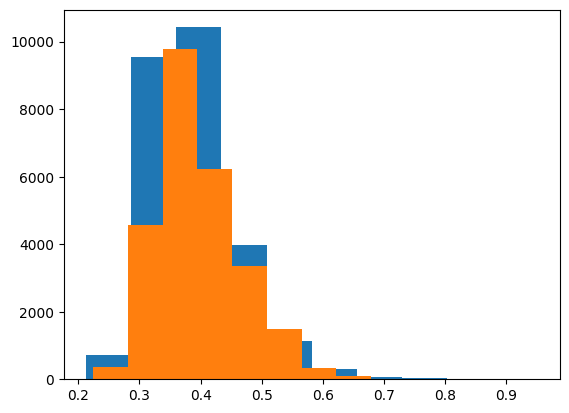

In [53]:
import matplotlib.pyplot as plt

plt.hist(protected_recs[1])
plt.hist(random_recs[1])

In [65]:
protected_recs_filtered = [i for i in protected_recs[1] if i > 0.70]
control_recs_filtered = [i for i in random_recs[1] if i > 0.70]

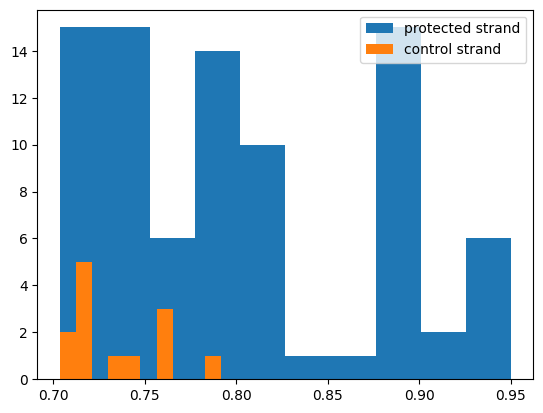

In [66]:
plt.hist(protected_recs_filtered, label="protected strand")
plt.hist(control_recs_filtered, label="control strand")
plt.legend()

In [68]:
# some metric here to compare to random strands - collision would not happen - we are actually seeing something useful
# Indicator that yes - here is this thing, frequency of candidates - need to understand usecase.
# Formalize and understand


In [69]:
# % of candidates over threshold value for protected strand vs control - and then the average recovery of 1.0

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Sample array
array = np.random.randint(0, 100, 100)  # Example array with values between 0 and 100

# Define thresholds
thresholds = np.linspace(0, np.max(array), 100)  # Create 100 threshold values from 0 to max

# Calculate the percentage of values above each threshold
percentages = [(np.sum(array > t) / len(array)) * 100 for t in thresholds]

# Plot the graph
plt.figure(figsize=(8, 5))
plt.plot(thresholds, percentages, label="Percentage of values > threshold")
plt.xlabel("Threshold")
plt.ylabel("Percentage")
plt.title("Percentage of Array Values Greater Than Threshold")
plt.grid()
plt.legend()
plt.show()